In [1]:
from arcgis import GIS
from arcgis.features import FeatureLayer, GeoAccessor

/opt/conda/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [3]:
gis=GIS('https://NSOE.maps.arcgis.com','anu4_790')

Enter password: ········


In [5]:
print("Logged in as: " + gis.properties.user.username)

Logged in as: anu4_790


In [6]:
flood_layer_service = gis.content.get('11955f1b47ec41a3af86650824e0c634')


In [8]:
flood_layer_service.type

'Image Service'

In [9]:
from arcgis.raster import ImageryLayer
flood_layer_service2 = ImageryLayer('11955f1b47ec41a3af86650824e0c634')

In [10]:
flood_layer_service.layers

[<ImageryLayer url:"https://landscape11.arcgis.com/arcgis/rest/services/USA_Flood_Hazard_Areas/ImageServer">]

In [11]:
flood_layer = flood_layer_service.layers[0]

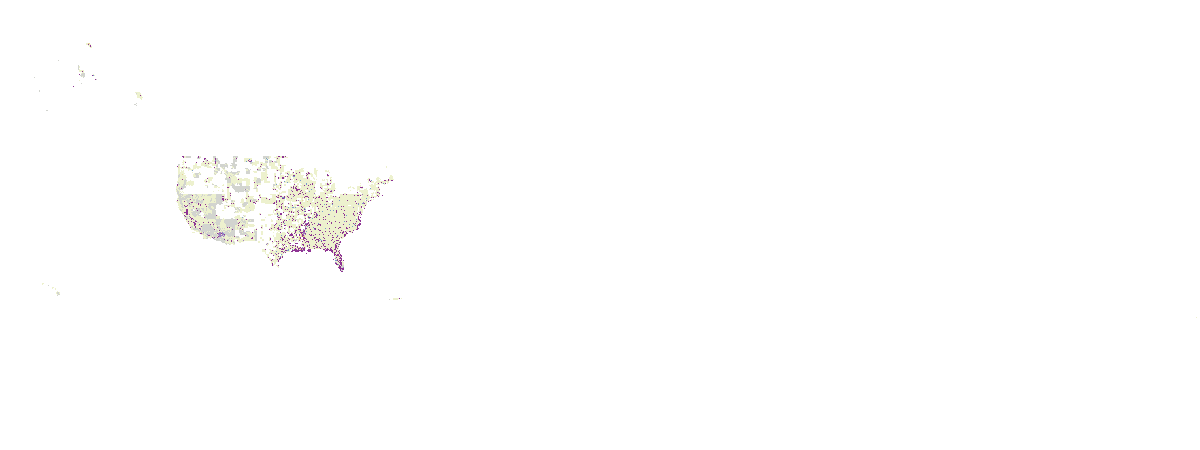

In [12]:
flood_layer

In [13]:
theExits=GeoAccessor.from_featureclass('../Data/MJBA/Exits.shp')

In [14]:
type(theExits)

pandas.core.frame.DataFrame

In [18]:
thePoint = theExits.at[0,'SHAPE']
type(thePoint)

arcgis.geometry._types.Point

In [19]:
thePoint.JSON

{'type': 'Point', 'coordinates': (-84.31430368976345, 35.01949184966918)}

In [23]:
flood_layer.identify(thePoint)['value']

'8'

In [49]:
theAttributes = flood_layer.attribute_table()['features']
theAttributes[0]

{'attributes': {'OBJECTID': 1,
  'FREQUENCY': 963562,
  'Value': 1,
  'Red': 142,
  'Green': 52,
  'Blue': 148,
  'ClassName': '1% Annual Chance Flood Hazard'}}

TypeError: list indices must be integers or slices, not str

In [50]:
classNames = [] #creates empty list
for theAttribute in theAttributes:
    className = theAttribute['attributes']['ClassName']
    classNames.append(className)
classNames

['1% Annual Chance Flood Hazard',
 'Regulatory Floodway',
 'Special Floodway',
 'Area of Undetermined Flood Hazard',
 '0.2% Annual Chance Flood Hazard',
 'Future Conditions 1% Annual Chance Flood Hazard',
 'Area with Reduced Risk Due to Levee',
 'Area of Minimal Flood Hazard']

In [51]:
classNames[7]

'Area of Minimal Flood Hazard'

In [54]:
def getFloodClass(thePoint):
    return classNames [int(flood_layer.identify(thePoint)['value'])-1]

In [55]:
getFloodClass(thePoint)

'Area of Minimal Flood Hazard'

In [56]:
theExits['Flood_cat'] = theExits['SHAPE'].apply(lambda x: getFloodClass(x))

In [57]:
theExits.to_csv('../Data/processed/exits_with_flood.csv')

In [58]:
theExits.spatial.to_featureclass('../Data/processed/exits_flood.shp')

'../Data/processed/exits_flood.shp'

In [60]:
theExits['Flood_cat'].value_counts()

Area of Minimal Flood Hazard                       1090
1% Annual Chance Flood Hazard                        58
0.2% Annual Chance Flood Hazard                      24
Regulatory Floodway                                   4
Future Conditions 1% Annual Chance Flood Hazard       2
Name: Flood_cat, dtype: int64